In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

In [68]:
df = pd.read_csv('BusinessAnalyst.csv')
df

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


# Data Cleaning

In [4]:
# Fix data mismatching columns
# Use salary estimate to calculate avg. salary
# seperate location to state and city columns

In [49]:
# Check which row starts mismatching
import re
misrow_index = 0
for i in df['Unnamed: 0']:
    if (str(i).isnumeric()):
        misrow_index += 1
    if not (str(i).isnumeric()):
        break

print(misrow_index)

3692


In [61]:
df_fix = df.iloc[3692:] #fetch mismatching rows
df_fix = df_fix.drop(columns = ['Competitors', 'Easy Apply'])
df_fix.columns = df.columns[2:] #adjust to correct column names
df_fix

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJac...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia,...",-1
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex ...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3695,Software Quality Assurance Analyst,$50K-$78K (Glassdoor est.),SUMMARY\n\nThe Software Quality Assurance (SQA...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1
3696,Senior Support Analyst,$50K-$78K (Glassdoor est.),Vacancy Name Senior Support Analyst\nVacancy R...,3.2,SmartStream Technologies\n3.2,"Jacksonville, FL","London, United Kingdom",501 to 1000 employees,2000,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


In [69]:
df = df[:3692].drop(columns=['Unnamed: 0', 'index'])
df = df.append(df_fix) # connect to fixed dataframe
df

/var/folders/xg/zm6rr8s55692hj08d7t5fjy00000gn/T/ipykernel_83079/950418810.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_fix)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


In [113]:
# Use salary estimate to calculate avg. salary
df[['min_salary', 'max_salary']] = df['Salary Estimate'].str.extract(r'(\d+)\D+(\d+)', expand=True).astype(int)
df['min_salary'] = df['min_salary'].apply(lambda x: x*1000)
df['max_salary'] = df['max_salary'].apply(lambda x: x*1000)
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1).round().astype(int)
df = df.drop(columns=['min_salary','max_salary', 'Salary Estimate'])

In [119]:
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,avg_salary
0,Business Analyst - Clinical & Logistics Platform,Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,79000
1,Business Analyst,We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,79000
2,Data Analyst,"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,79000
3,"Information Security Analyst, Incident Response",Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,79000
4,Analyst - FP&A Global Revenue,Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,79000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,90000
4088,System Analyst (Data) - PL/SQl Server,Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,90000
4089,Programmer Analyst- PeopleSoft ( Finance and S...,Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,90000
4090,Loss Mitigation Analyst,Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,90000


In [2]:
# seperate location to state and city columns
df['state'] = df['Location'].str.extract(r'([A-Z]{2})$')
df['city'] = df['Location'].str.extract(r'([A-Za-z\s]*),')
df = df.drop(columns=['Location'])

NameError: name 'df' is not defined

In [152]:
df.to_csv('business analyst job offer data.csv')

# Data Exploration

Text(0.5, 1.0, 'Number of job offers by State')

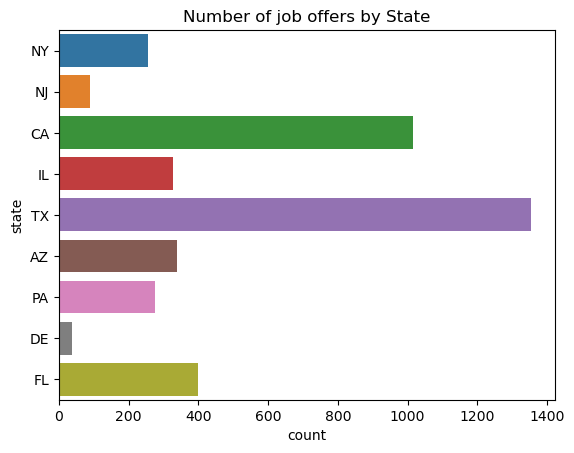

In [150]:
sb.countplot(y='state', data=df).set_title('Number of job offers by State')